Title
===

In [ ]:
Name = ['Mert Sami      ', 'Myrthe Peeters ']
SNR = [' 2013923', ' 1258747']

titles = ['Name', ' SNR']
data = [titles] +list(zip(Name, SNR))

for i, d in enumerate(data):
    line = '|'.join(str(x).ljust(15) for x in d)
    print(line)
    if i == 0:
        print('-' * len(line))

# Abstract

# Research Question

Are female doctors in Houston College of Medicine being discriminated against in giving promotions and setting salaries compared to their male counterparts in 1994 and 1995?

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('mpE8ttCEd-w')


# Data

The source from which the data is retained can be found here 

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import arange, optimize
from scipy.stats import wilcoxon, mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_lawsuit = pd.read_csv('Lawsuit.csv')
df_lawsuit

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
5,6,1,1,0,1,7.7,10,3,79714,87531
6,7,1,1,0,1,8.3,9,2,89781,99972
7,8,1,1,1,1,5.3,11,3,151423,166601
8,9,1,1,0,0,7.7,18,3,81271,85437
9,10,1,1,0,0,7.5,9,2,83018,91369


In [9]:
df_malelawsuit = pd.DataFrame({'Gender':[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], 
'Exper':[9, 10, 6, 27, 10, 10, 9, 11, 18, 9, 12, 8, 18, 15, 10, 9, 16, 9, 37, 14, 27, 14, 17, 23, 8, 19, 15, 16, 15, 7, 2, 12, 7, 14, 8, 7, 16, 3, 16,
 12, 8, 11, 10, 15, 9, 6, 13, 13, 6, 9, 10, 9, 8,
 25, 11, 9, 27, 32, 23, 14, 11, 9, 5, 12, 18, 19, 10, 8, 4, 14, 10, 4, 14, 9, 8, 3, 12, 7, 12, 4, 5, 2, 8, 2, 5, 11, 3, 16, 5, 5, 24,
 11, 5, 16, 11, 16, 16, 9, 5, 6, 9, 9, 6, 10, 9, 5, 4, 7, 11, 10, 5, 6, 17, 10, 15,
 10, 5, 8, 7, 11, 7, 4, 6, 4, 2, 5, 16, 2, 4, 6, 10, 5, 14, 5, 13, 5, 4, 7, 3, 10, 1, 11, 13, 9, 4, 11, 13, 18, 12, 14, 10, 11, 10,
 15,
 8,
 7,
 12,
 15,
 13,
 8,
 6,
 5,
 22,
 2,
 18,
 4,
 5,
 6,
 6,
 8,
 5,
 37,
 3,
 14,
 7,
 8,
 14,
 8,
 25,
 5,
 8,
 21,
 18,
 2,
 10,
 26,
 5,
 10,
 16,
 8,
 15,
 3,
 5,
 2,
 14,
 5,
 13,
 4,
 4,
 7,
 7,
 1,
 5,
 7,
 6,
 5,
 6,
 12,
 6,
 6,
 8,
 3,
 6,
 10,
 2,
 23,
 8,
 9,
 5,
 14,
 3,
 6,
 5,
 21,
 16,
 13,
 21,
 5,
 11,
 22,
 5,
 27,
 5,
 6,
 7,
 11,
 13,
 7,
 12,
 10,
 10,
 8,
 5,
 12,
 7,
 7,
 14,
 14,
 16,
 6,
 15,
 2,
 25,
 15,
 5,
 10,
 8,
 9,
 8,
 2,
 5],'Cert':[0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1], 'Sal94':[77836,
 69994,
 62872,
 155196,
 89268,
 79714,
 89781,
 151423,
 81271,
 83018,
 80214,
 110302,
 137106,
 77545,
 90223,
 81197,
 90178,
 105564,
 115804,
 113149,
 157510,
 97104,
 131815,
 134135,
 92198,
 99304,
 82132,
 108770,
 109775,
 66375,
 57838,
 90631,
 60930,
 87231,
 68582,
 63280,
 106412,
 65337,
 143334,
 90771,
 81769,
 94103,
 102631,
 109164,
 63779,
 75362,
 124836,
 77012,
 67277,
 73448,
 97707,
 106130,
 81049,
 140315,
 84571,
 58126,
 133284,
 142333,
 71073,
 76255,
 105348,
 86844,
 52582,
 110836,
 144150,
 122240,
 68573,
 63936,
 71404,
 102076,
 94715,
 58634,
 119851,
 78650,
 57862,
 67113,
 81078,
 60403,
 90964,
 52945,
 56550,
 34514,
 56177,
 50588,
 60415,
 91409,
 56250,
 127725,
 63426,
 45826,
 154326,
 87351,
 123859,
 118121,
 174479,
 196704,
 186953,
 107862,
 105821,
 114730,
 142382,
 67581,
 67934,
 118101,
 127710,
 70794,
 81728,
 71015,
 117276,
 106535,
 68825,
 109599,
 154159,
 145503,
 161383,
 113443,
 118561,
 147709,
 121969,
 101890,
 114233,
 77087,
 113382,
 102177,
 116506,
 130386,
 159687,
 107750,
 91211,
 135216,
 164048,
 84390,
 170428,
 124994,
 90130,
 102021,
 88484,
 110975,
 81422,
 130939,
 111630,
 182945,
 163671,
 204433,
 135139,
 147213,
 207737,
 244025,
 167199,
 209377,
 209189,
 186973,
 209171,
 230268,
 186022,
 179897,
 236470,
 172793,
 285301,
 200543,
 152485,
 154644,
 255654,
 138896,
 260631,
 183972,
 128027,
 161815,
 149011,
 167305,
 153549,
 300975,
 124442,
 163486,
 155006,
 129499,
 216391,
 171016,
 246763,
 175396,
 144542,
 275377,
 262090,
 250000,
 158243,
 218341,
 141044,
 164174,
 203152,
 194784,
 223040,
 138635,
 176028,
 126343,
 249687,
 127525,
 281058,
 149631,
 142249,
 166863,
 164080,
 112221,
 161352,
 209818,
 133097,
 171391,
 166482,
 242614,
 146396,
 130153,
 175791,
 138775,
 167844,
 202231,
 106802,
 204279,
 185413,
 150258,
 128433,
 123940,
 107524,
 214219,
 312966,
 342834,
 312892,
 317399,
 342662,
 247953,
 339533,
 393408,
 206097,
 419129,
 250667,
 212780,
 232735,
 244940,
 287433,
 279661,
 428876,
 326460,
 366150,
 299582,
 259576,
 316754,
 220374,
 262328,
 337885,
 355982,
 298359,
 247576,
 251079,
 154310,
 411219,
 266880,
 223736,
 322698,
 297174,
 308081,
 211269,
 210801,
 244551], 'Sal95':[84612,
 78497,
 67756,
 173220,
 96099,
 87531,
 99972,
 166601,
 85437,
 91369,
 88676,
 116654,
 149222,
 85041,
 97640,
 91800,
 101828,
 117743,
 126989,
 124432,
 168673,
 104090,
 145843,
 151837,
 98155,
 110321,
 90058,
 119697,
 120208,
 71139,
 62907,
 99079,
 66190,
 95385,
 76987,
 68420,
 116959,
 70166,
 153524,
 102927,
 88896,
 102983,
 111125,
 120696,
 73033,
 81615,
 137791,
 84536,
 72721,
 80294,
 101617,
 118258,
 88505,
 150710,
 92879,
 64522,
 151373,
 154372,
 78715,
 82466,
 118635,
 97061,
 58923,
 120397,
 151887,
 134882,
 75286,
 69526,
 78589,
 112009,
 106608,
 62601,
 131050,
 88661,
 63728,
 74272,
 86221,
 68828,
 97303,
 57841,
 62323,
 38675,
 61652,
 57431,
 66323,
 102511,
 59530,
 143348,
 71068,
 48138,
 165884,
 95429,
 130292,
 130697,
 193342,
 218955,
 206984,
 117240,
 116932,
 126118,
 151698,
 72896,
 75659,
 129862,
 143799,
 77113,
 91764,
 80747,
 126139,
 117574,
 74209,
 121829,
 169191,
 162253,
 181196,
 126189,
 131704,
 161814,
 136415,
 113893,
 127955,
 84890,
 124153,
 112844,
 127815,
 145073,
 177706,
 117214,
 103513,
 150489,
 182049,
 92512,
 186726,
 140026,
 95908,
 109758,
 99505,
 123139,
 89202,
 142566,
 125268,
 198762,
 181774,
 226581,
 148117,
 155826,
 229706,
 268210,
 182401,
 225498,
 230270,
 204769,
 229301,
 253090,
 207634,
 196338,
 265121,
 184391,
 297397,
 219584,
 168170,
 170967,
 285939,
 152284,
 284841,
 201691,
 142963,
 173837,
 163795,
 183834,
 168707,
 332119,
 131361,
 175271,
 169118,
 141661,
 234992,
 189308,
 279255,
 189904,
 158513,
 294336,
 289778,
 276163,
 177587,
 245432,
 157509,
 183538,
 216873,
 217478,
 239253,
 149539,
 192799,
 136988,
 267554,
 139017,
 313400,
 165420,
 154386,
 189852,
 180937,
 126149,
 177997,
 233774,
 147327,
 185895,
 180608,
 265856,
 161031,
 139887,
 195678,
 152231,
 189487,
 225599,
 114961,
 227790,
 207462,
 160253,
 145718,
 138566,
 116283,
 236305,
 336960,
 367284,
 344801,
 345204,
 369712,
 273737,
 387205,
 435572,
 220899,
 472589,
 270417,
 237094,
 261236,
 269554,
 314926,
 317179,
 462342,
 364139,
 408898,
 339637,
 280168,
 349294,
 239614,
 295619,
 376651,
 389994,
 320315,
 271773,
 275246,
 171664,
 455468,
 297902,
 248014,
 356961,
 323699,
 339664,
 241577,
 233905,
 265502]})

In [10]:
s=1
df_malelawsuit1 = df_malelawsuit[df_malelawsuit['Gender'] >=s]
df_malelawsuit1

,Cert,Exper,Gender,Sal94,Sal95
0,0,9,1,77836,84612
1,0,10,1,69994,78497
2,0,6,1,62872,67756
3,1,27,1,155196,173220
4,0,10,1,89268,96099
5,1,10,1,79714,87531
6,1,9,1,89781,99972
7,1,11,1,151423,166601
8,0,18,1,81271,85437
9,0,9,1,83018,91369


In [11]:
df_femalelawsuit1 = df_malelawsuit[df_malelawsuit['Gender'] <s]
df_femalelawsuit1

,Cert,Exper,Gender,Sal94,Sal95
30,0,2,0,57838,62907
31,1,12,0,90631,99079
32,1,7,0,60930,66190
33,0,14,0,87231,95385
34,0,8,0,68582,76987
35,0,7,0,63280,68420
36,0,16,0,106412,116959
37,1,3,0,65337,70166
38,1,16,0,143334,153524
39,0,12,0,90771,102927


In [12]:
df_gendernew = df_lawsuit.pivot_table(index='Gender',values='Sal95')

In [13]:
df_gendernew

,Sal95
Gender,
0,130876.915094
1,194914.090323


In [14]:
df_Genderseperated = df_lawsuit.reset_index().pivot('ID', 'Gender','Sal94')

In [15]:
df_Genderseperated

Gender,0,1
ID,,
1,NaN,77836.0
2,NaN,69994.0
3,NaN,62872.0
4,NaN,155196.0
5,NaN,89268.0
6,NaN,79714.0
7,NaN,89781.0
8,NaN,151423.0
9,NaN,81271.0


In [16]:
df_Gender = df_lawsuit.Gender.tolist()
df_Sal94 = df_lawsuit.Sal94.tolist()
df_Sal95 = df_lawsuit.Sal95.tolist()
df_Exper = df_lawsuit.Exper.tolist()
df_Rank = df_lawsuit.Rank.tolist()
df_Clin = df_lawsuit.Clin.tolist()
df_Dept = df_lawsuit.Dept.tolist()
df_Cert = df_lawsuit.Cert.tolist()

In [17]:
df_FemGender = df_femalelawsuit1.Gender.tolist()
df_FemSal94 = df_femalelawsuit1.Sal94.tolist()
df_FemSal95 = df_femalelawsuit1.Sal95.tolist()
df_FemExper = df_femalelawsuit1.Exper.tolist()
df_FemCert = df_femalelawsuit1.Cert.tolist()

In [18]:
df_MalGender = df_malelawsuit1.Gender.tolist()
df_MalSal94 = df_malelawsuit1.Sal94.tolist()
df_MalSal95 = df_malelawsuit1.Sal95.tolist()
df_MalExper = df_malelawsuit1.Exper.tolist()
df_MalCert = df_malelawsuit1.Cert.tolist()

In [19]:
u, p_value = mannwhitneyu(df_FemSal94, df_MalSal94)

In [20]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.14071311034e-09


In [21]:
round(2.14071311034e-09)

0

In [22]:
u, p_value = mannwhitneyu(df_FemSal95, df_MalSal95)

In [23]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.14071311034e-09


In [24]:
round(2.14071311034e-09)

0

In [25]:
u, p_value = mannwhitneyu(df_FemExper, df_MalExper)

In [26]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 4.96119877184e-10


In [27]:
round(4.96119877184e-10)

0

In [28]:
u, p_value = mannwhitneyu(df_FemCert, df_MalCert)

In [29]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0375950043844


In [30]:
df_lawsuit.groupby(['Gender']).mean()

,ID,Dept,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
Gender,,,,,,,,,
0,129.301887,3.330189,0.566038,0.660377,5.350000,7.490566,1.500000,118871.273585,130876.915094
1,132.161290,3.870968,0.645161,0.761290,4.646452,12.103226,2.167742,177338.761290,194914.090323


In [77]:
np.mean(df_MalExper)

12.103225806451613

In [78]:
np.mean(df_FemSal94)

118871.27358490566

In [31]:
df_Sal94

[77836,
 69994,
 62872,
 155196,
 89268,
 79714,
 89781,
 151423,
 81271,
 83018,
 80214,
 110302,
 137106,
 77545,
 90223,
 81197,
 90178,
 105564,
 115804,
 113149,
 157510,
 97104,
 131815,
 134135,
 92198,
 99304,
 82132,
 108770,
 109775,
 66375,
 57838,
 90631,
 60930,
 87231,
 68582,
 63280,
 106412,
 65337,
 143334,
 90771,
 81769,
 94103,
 102631,
 109164,
 63779,
 75362,
 124836,
 77012,
 67277,
 73448,
 97707,
 106130,
 81049,
 140315,
 84571,
 58126,
 133284,
 142333,
 71073,
 76255,
 105348,
 86844,
 52582,
 110836,
 144150,
 122240,
 68573,
 63936,
 71404,
 102076,
 94715,
 58634,
 119851,
 78650,
 57862,
 67113,
 81078,
 60403,
 90964,
 52945,
 56550,
 34514,
 56177,
 50588,
 60415,
 91409,
 56250,
 127725,
 63426,
 45826,
 154326,
 87351,
 123859,
 118121,
 174479,
 196704,
 186953,
 107862,
 105821,
 114730,
 142382,
 67581,
 67934,
 118101,
 127710,
 70794,
 81728,
 71015,
 117276,
 106535,
 68825,
 109599,
 154159,
 145503,
 161383,
 113443,
 118561,
 147709,
 121969

In [32]:
import plotly.offline as ply
import plotly.graph_objs as go

Female = go.Scatter(
    x = [2,
 12,
 7,
 14,
 8,
 7,
 16,
 3,
 16,
 12,
 8,
 11,
 10,
 15,
 9,
 6,
 13,
 13,
 6,
 9,
 10,
 4,
 14,
 9,
 8,
 3,
 12,
 7,
 12,
 4,
 5,
 2,
 8,
 2,
 5,
 11,
 3,
 16,
 5,
 5,
 9,
 9,
 6,
 10,
 9,
 5,
 4,
 7,
 11,
 10,
 5,
 4,
 6,
 4,
 2,
 5,
 16,
 2,
 4,
 6,
 10,
 5,
 14,
 5,
 13,
 5,
 4,
 7,
 3,
 10,
 1,
 3,
 5,
 2,
 14,
 5,
 13,
 4,
 4,
 7,
 7,
 1,
 5,
 7,
 6,
 5,
 6,
 12,
 6,
 6,
 8,
 3,
 6,
 10,
 2,
 23,
 8,
 9,
 5,
 14,
 3,
 8,
 9,
 8,
 2,
 5],
    y = [57838,
 90631,
 60930,
 87231,
 68582,
 63280,
 106412,
 65337,
 143334,
 90771,
 81769,
 94103,
 102631,
 109164,
 63779,
 75362,
 124836,
 77012,
 67277,
 73448,
 94715,
 58634,
 119851,
 78650,
 57862,
 67113,
 81078,
 60403,
 90964,
 52945,
 56550,
 34514,
 56177,
 50588,
 60415,
 91409,
 56250,
 127725,
 63426,
 45826,
 142382,
 67581,
 67934,
 118101,
 127710,
 70794,
 81728,
 71015,
 117276,
 106535,
 68825,
 77087,
 113382,
 102177,
 116506,
 130386,
 159687,
 107750,
 91211,
 135216,
 164048,
 84390,
 170428,
 124994,
 90130,
 102021,
 88484,
 110975,
 81422,
 130939,
 111630,
 138635,
 176028,
 126343,
 249687,
 127525,
 281058,
 149631,
 142249,
 166863,
 164080,
 112221,
 161352,
 209818,
 133097,
 171391,
 166482,
 242614,
 146396,
 130153,
 175791,
 138775,
 167844,
 202231,
 106802,
 204279,
 185413,
 150258,
 128433,
 123940,
 107524,
 297174,
 308081,
 211269,
 210801,
 244551],
    name='Female',
    line=dict(
        shape='spline')
)
Male = go.Scatter(
    x = [9,
 10,
 6,
 27,
 10,
 10,
 9,
 11,
 18,
 9,
 12,
 8,
 18,
 15,
 10,
 9,
 16,
 9,
 37,
 14,
 27,
 14,
 17,
 23,
 8,
 19,
 15,
 16,
 15,
 7,
 10,
 9,
 8,
 25,
 11,
 9,
 27,
 32,
 23,
 14,
 11,
 9,
 5,
 12,
 18,
 19,
 10,
 8,
 4,
 14,
 24,
 11,
 5,
 16,
 11,
 16,
 16,
 9,
 5,
 6,
 6,
 17,
 10,
 15,
 10,
 5,
 8,
 7,
 11,
 7,
 11,
 13,
 9,
 4,
 11,
 13,
 18,
 12,
 14,
 10,
 11,
 10,
 15,
 8,
 7,
 12,
 15,
 13,
 8,
 6,
 5,
 22,
 2,
 18,
 4,
 5,
 6,
 6,
 8,
 5,
 37,
 3,
 14,
 7,
 8,
 14,
 8,
 25,
 5,
 8,
 21,
 18,
 2,
 10,
 26,
 5,
 10,
 16,
 8,
 15,
 6,
 5,
 21,
 16,
 13,
 21,
 5,
 11,
 22,
 5,
 27,
 5,
 6,
 7,
 11,
 13,
 7,
 12,
 10,
 10,
 8,
 5,
 12,
 7,
 7,
 14,
 14,
 16,
 6,
 15,
 2,
 25,
 15,
 5,
 10],
    y = [77836,
 69994,
 62872,
 155196,
 89268,
 79714,
 89781,
 151423,
 81271,
 83018,
 80214,
 110302,
 137106,
 77545,
 90223,
 81197,
 90178,
 105564,
 115804,
 113149,
 157510,
 97104,
 131815,
 134135,
 92198,
 99304,
 82132,
 108770,
 109775,
 66375,
 97707,
 106130,
 81049,
 140315,
 84571,
 58126,
 133284,
 142333,
 71073,
 76255,
 105348,
 86844,
 52582,
 110836,
 144150,
 122240,
 68573,
 63936,
 71404,
 102076,
 154326,
 87351,
 123859,
 118121,
 174479,
 196704,
 186953,
 107862,
 105821,
 114730,
 109599,
 154159,
 145503,
 161383,
 113443,
 118561,
 147709,
 121969,
 101890,
 114233,
 182945,
 163671,
 204433,
 135139,
 147213,
 207737,
 244025,
 167199,
 209377,
 209189,
 186973,
 209171,
 230268,
 186022,
 179897,
 236470,
 172793,
 285301,
 200543,
 152485,
 154644,
 255654,
 138896,
 260631,
 183972,
 128027,
 161815,
 149011,
 167305,
 153549,
 300975,
 124442,
 163486,
 155006,
 129499,
 216391,
 171016,
 246763,
 175396,
 144542,
 275377,
 262090,
 250000,
 158243,
 218341,
 141044,
 164174,
 203152,
 194784,
 223040,
 214219,
 312966,
 342834,
 312892,
 317399,
 342662,
 247953,
 339533,
 393408,
 206097,
 419129,
 250667,
 212780,
 232735,
 244940,
 287433,
 279661,
 428876,
 326460,
 366150,
 299582,
 259576,
 316754,
 220374,
 262328,
 337885,
 355982,
 298359,
 247576,
 251079,
 154310,
 411219,
 266880,
 223736,
 322698],
    name='Male',
    line=dict(
        shape='spline')
)
Total = go.Scatter(
    x = [9,
 10,
 6,
 27,
 10,
 10,
 9,
 11,
 18,
 9,
 12,
 8,
 18,
 15,
 10,
 9,
 16,
 9,
 37,
 14,
 27,
 14,
 17,
 23,
 8,
 19,
 15,
 16,
 15,
 7,
 2,
 12,
 7,
 14,
 8,
 7,
 16,
 3,
 16,
 12,
 8,
 11,
 10,
 15,
 9,
 6,
 13,
 13,
 6,
 9,
 10,
 9,
 8,
 25,
 11,
 9,
 27,
 32,
 23,
 14,
 11,
 9,
 5,
 12,
 18,
 19,
 10,
 8,
 4,
 14,
 10,
 4,
 14,
 9,
 8,
 3,
 12,
 7,
 12,
 4,
 5,
 2,
 8,
 2,
 5,
 11,
 3,
 16,
 5,
 5,
 24,
 11,
 5,
 16,
 11,
 16,
 16,
 9,
 5,
 6,
 9,
 9,
 6,
 10,
 9,
 5,
 4,
 7,
 11,
 10,
 5,
 6,
 17,
 10,
 15,
 10,
 5,
 8,
 7,
 11,
 7,
 4,
 6,
 4,
 2,
 5,
 16,
 2,
 4,
 6,
 10,
 5,
 14,
 5,
 13,
 5,
 4,
 7,
 3,
 10,
 1,
 11,
 13,
 9,
 4,
 11,
 13,
 18,
 12,
 14,
 10,
 11,
 10,
 15,
 8,
 7,
 12,
 15,
 13,
 8,
 6,
 5,
 22,
 2,
 18,
 4,
 5,
 6,
 6,
 8,
 5,
 37,
 3,
 14,
 7,
 8,
 14,
 8,
 25,
 5,
 8,
 21,
 18,
 2,
 10,
 26,
 5,
 10,
 16,
 8,
 15,
 3,
 5,
 2,
 14,
 5,
 13,
 4,
 4,
 7,
 7,
 1,
 5,
 7,
 6,
 5,
 6,
 12,
 6,
 6,
 8,
 3,
 6,
 10,
 2,
 23,
 8,
 9,
 5,
 14,
 3,
 6,
 5,
 21,
 16,
 13,
 21,
 5,
 11,
 22,
 5,
 27,
 5,
 6,
 7,
 11,
 13,
 7,
 12,
 10,
 10,
 8,
 5,
 12,
 7,
 7,
 14,
 14,
 16,
 6,
 15,
 2,
 25,
 15,
 5,
 10,
 8,
 9,
 8,
 2,
 5],
    y = [77836,
 69994,
 62872,
 155196,
 89268,
 79714,
 89781,
 151423,
 81271,
 83018,
 80214,
 110302,
 137106,
 77545,
 90223,
 81197,
 90178,
 105564,
 115804,
 113149,
 157510,
 97104,
 131815,
 134135,
 92198,
 99304,
 82132,
 108770,
 109775,
 66375,
 57838,
 90631,
 60930,
 87231,
 68582,
 63280,
 106412,
 65337,
 143334,
 90771,
 81769,
 94103,
 102631,
 109164,
 63779,
 75362,
 124836,
 77012,
 67277,
 73448,
 97707,
 106130,
 81049,
 140315,
 84571,
 58126,
 133284,
 142333,
 71073,
 76255,
 105348,
 86844,
 52582,
 110836,
 144150,
 122240,
 68573,
 63936,
 71404,
 102076,
 94715,
 58634,
 119851,
 78650,
 57862,
 67113,
 81078,
 60403,
 90964,
 52945,
 56550,
 34514,
 56177,
 50588,
 60415,
 91409,
 56250,
 127725,
 63426,
 45826,
 154326,
 87351,
 123859,
 118121,
 174479,
 196704,
 186953,
 107862,
 105821,
 114730,
 142382,
 67581,
 67934,
 118101,
 127710,
 70794,
 81728,
 71015,
 117276,
 106535,
 68825,
 109599,
 154159,
 145503,
 161383,
 113443,
 118561,
 147709,
 121969,
 101890,
 114233,
 77087,
 113382,
 102177,
 116506,
 130386,
 159687,
 107750,
 91211,
 135216,
 164048,
 84390,
 170428,
 124994,
 90130,
 102021,
 88484,
 110975,
 81422,
 130939,
 111630,
 182945,
 163671,
 204433,
 135139,
 147213,
 207737,
 244025,
 167199,
 209377,
 209189,
 186973,
 209171,
 230268,
 186022,
 179897,
 236470,
 172793,
 285301,
 200543,
 152485,
 154644,
 255654,
 138896,
 260631,
 183972,
 128027,
 161815,
 149011,
 167305,
 153549,
 300975,
 124442,
 163486,
 155006,
 129499,
 216391,
 171016,
 246763,
 175396,
 144542,
 275377,
 262090,
 250000,
 158243,
 218341,
 141044,
 164174,
 203152,
 194784,
 223040,
 138635,
 176028,
 126343,
 249687,
 127525,
 281058,
 149631,
 142249,
 166863,
 164080,
 112221,
 161352,
 209818,
 133097,
 171391,
 166482,
 242614,
 146396,
 130153,
 175791,
 138775,
 167844,
 202231,
 106802,
 204279,
 185413,
 150258,
 128433,
 123940,
 107524,
 214219,
 312966,
 342834,
 312892,
 317399,
 342662,
 247953,
 339533,
 393408,
 206097,
 419129,
 250667,
 212780,
 232735,
 244940,
 287433,
 279661,
 428876,
 326460,
 366150,
 299582,
 259576,
 316754,
 220374,
 262328,
 337885,
 355982,
 298359,
 247576,
 251079,
 154310,
 411219,
 266880,
 223736,
 322698,
 297174,
 308081,
 211269,
 210801,
 244551],
    name='Total',
    line=dict(
        shape='spline')
)
data = [Female, Male, Total]
layout = dict(title = 'Salary/Experience',
              xaxis = dict(title = 'Experience'),
              yaxis = dict(title = 'Salary'),
              )
fig = dict(data=data, layout=layout)
ply.iplot(fig, filename='Lawsuit.csv')
plt.show()

In [33]:
type('Gender')

str

In [34]:
df_Sal94

[77836,
 69994,
 62872,
 155196,
 89268,
 79714,
 89781,
 151423,
 81271,
 83018,
 80214,
 110302,
 137106,
 77545,
 90223,
 81197,
 90178,
 105564,
 115804,
 113149,
 157510,
 97104,
 131815,
 134135,
 92198,
 99304,
 82132,
 108770,
 109775,
 66375,
 57838,
 90631,
 60930,
 87231,
 68582,
 63280,
 106412,
 65337,
 143334,
 90771,
 81769,
 94103,
 102631,
 109164,
 63779,
 75362,
 124836,
 77012,
 67277,
 73448,
 97707,
 106130,
 81049,
 140315,
 84571,
 58126,
 133284,
 142333,
 71073,
 76255,
 105348,
 86844,
 52582,
 110836,
 144150,
 122240,
 68573,
 63936,
 71404,
 102076,
 94715,
 58634,
 119851,
 78650,
 57862,
 67113,
 81078,
 60403,
 90964,
 52945,
 56550,
 34514,
 56177,
 50588,
 60415,
 91409,
 56250,
 127725,
 63426,
 45826,
 154326,
 87351,
 123859,
 118121,
 174479,
 196704,
 186953,
 107862,
 105821,
 114730,
 142382,
 67581,
 67934,
 118101,
 127710,
 70794,
 81728,
 71015,
 117276,
 106535,
 68825,
 109599,
 154159,
 145503,
 161383,
 113443,
 118561,
 147709,
 121969

In [35]:
np_df_Gender = np.array(df_Gender)

In [36]:
np_df_Gender[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [37]:
df_lawsuit.head(15)

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
5,6,1,1,0,1,7.7,10,3,79714,87531
6,7,1,1,0,1,8.3,9,2,89781,99972
7,8,1,1,1,1,5.3,11,3,151423,166601
8,9,1,1,0,0,7.7,18,3,81271,85437
9,10,1,1,0,0,7.5,9,2,83018,91369


In [38]:
df_lawsuit.groupby(['Cert'])['Rank'].mean()

Cert
0    1.876712
1    1.904255
Name: Rank, dtype: float64

In [39]:
def get_data_into_shape(df_lawsuit):
    df['Gender'] = df['Gender'].astype('category')
    return df

In [40]:
df_lawsuit.loc[(df_lawsuit.Exper) & (df_lawsuit.Sal94) & (df_lawsuit.Sal95)]

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
0,1,1,1,0,0,7.4,9,3,77836,84612
0,1,1,1,0,0,7.4,9,3,77836,84612
0,1,1,1,0,0,7.4,9,3,77836,84612
0,1,1,1,0,0,7.4,9,3,77836,84612
2,3,1,1,0,0,8.1,6,1,62872,67756
0,1,1,1,0,0,7.4,9,3,77836,84612
9,10,1,1,0,0,7.5,9,2,83018,91369
16,17,1,1,0,0,7.3,16,3,90178,101828
8,9,1,1,0,0,7.7,18,3,81271,85437


In [41]:
df_lawsuit.groupby(['Gender', 'Rank']).count()

ID  Dept  Clin  Cert  Prate  Exper  Sal94  Sal95
Gender Rank                                                  
0      1     69    69    69    69     69     69     69     69
       2     21    21    21    21     21     21     21     21
       3     16    16    16    16     16     16     16     16
1      1     43    43    43    43     43     43     43     43
       2     43    43    43    43     43     43     43     43
       3     69    69    69    69     69     69     69     69

In [42]:
df_lawsuit.groupby(['Cert'])['Rank'].count()

Cert
0     73
1    188
Name: Rank, dtype: int64

In [43]:
df_lawsuit.groupby(['Gender'])['Rank'].mean()

Gender
0    1.500000
1    2.167742
Name: Rank, dtype: float64

In [44]:
df_lawsuit.groupby(['Gender']).mean()

,ID,Dept,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
Gender,,,,,,,,,
0,129.301887,3.330189,0.566038,0.660377,5.350000,7.490566,1.500000,118871.273585,130876.915094
1,132.161290,3.870968,0.645161,0.761290,4.646452,12.103226,2.167742,177338.761290,194914.090323


In [45]:
df_lawsuit.groupby(['Cert', 'Gender'])['Rank'].mean()

Cert  Gender
0     0         1.583333
      1         2.162162
1     0         1.457143
      1         2.169492
Name: Rank, dtype: float64

In [46]:
datawag = [[1, 1, 0, 0, 7.4, 9, 3, 77836, 84612], 
           [1, 1, 0, 0, 6.7, 10, 2, 69994, 78497], 
           [1, 1, 0, 0, 8.1, 6, 1, 82872, 67756], 
           [1, 1, 1, 1, 5.1, 27, 3, 155196, 173220],
           [1, 1, 0, 0, 7.0, 10, 3, 89268, 96099], 
           [1, 1, 0, 1, 7.7, 10, 3, 79714, 87531], 
           [1, 1, 0, 1, 7.3, 9, 2, 89781, 99972], 
           [1, 1, 1, 1, 5.3, 11, 3, 151423, 166601], 
           [1, 1, 0, 0, 7.7, 18, 3, 81271, 85437], 
           [1, 1, 0, 0, 7.5, 9.0, 2, 73018, 91369], 
           [1, 1, 0, 0, 7.8, 12, 2, 80214, 88676], 
           [1, 1, 0, 1, 7.3, 8.0, 2, 110302, 116654], 
           [1, 1, 1, 1, 5.4, 18, 3, 137106, 149222], 
           [1, 1, 0, 0, 7.5, 15, 2, 77545, 85041], 
           [1, 1, 0, 0, 6.8, 10, 2, 90223, 97640], 
           [1, 1, 0, 0, 8.1, 9.0, 3, 81119, 91800], 
           [1, 1, 0, 0, 7.3, 16, 3, 90178, 101828], 
           [1, 1, 0, 1, 7.7, 9.0, 3, 105564, 117743], 
           [1, 1, 0, 0, 7.1, 37, 2, 115804, 126989], 
           [1, 1, 0, 0, 7.2, 14, 3, 113149, 124432], 
           [1, 1, 0, 1, 7.6, 27, 3, 157510, 168673], 
           [1, 1, 0, 0, 7.1, 14, 3, 97104, 104090], 
           [1, 1, 0, 1, 7.3, 17, 3, 131815, 145843], 
           [1, 1, 0, 1, 6.9, 23, 3, 134135, 151837], 
           [1, 1, 0, 1, 7.4, 8, 3, 92198, 98155],  
           [1, 1, 0, 1, 6.9, 19, 3, 99304, 110321], 
           [1, 1, 0, 0, 8.0, 15, 2, 82132, 90058], 
           [1, 1, 0, 1, 7.0, 16, 3, 108770, 119697], 
           [1, 1, 0, 1, 6.9, 15, 3, 109775, 120208], 
           [1, 1, 0, 0, 7.7, 7, 1, 66375, 71139], 
           [1, 0, 0, 0, 7.2, 2, 1, 57838, 62907], 
           [1, 0, 0, 1, 7.7, 12, 2, 90631, 99079], 
           [1, 0, 0, 1, 7.9, 7, 1, 60930, 66190], 
           [1, 0, 0, 0, 7.1, 14, 2, 87231, 95385], 
           [1, 0, 0, 0, 7.4, 8, 2, 68582, 76987], 
           [1, 0, 0, 0, 7.3, 7, 1, 63280, 68420], 
           [1, 0, 0, 0, 7.9, 16, 3, 106412, 116959], 
           [1, 0, 0, 1, 7.2, 3, 1, 75337, 71066], 
           [1, 0, 1, 1, 7.4, 16, 3, 143334, 153524], 
           [1, 0, 0, 0, 8.0, 12, 3, 90771, 102927], 
           [1, 0, 0, 0, 7.1, 8, 2, 81769, 88896], 
           [1, 0, 0, 1, 7.5, 11, 1, 94103, 102983], 
           [1, 0, 0, 1, 7.6, 10, 1, 102631, 111125], 
           [1, 0, 1, 1, 6.0, 15, 1, 109164, 120696], 
           [1, 0, 0, 0, 7.1, 9, 1, 63779, 73033], 
           [1, 0, 0, 0, 8, 6, 1, 75362, 81615], 
           [1, 0, 1, 0, 4.6, 13, 2, 124836, 137791], 
           [1, 0, 0, 0, 7.7, 13, 1, 77012, 84536], 
           [1, 0, 0, 1, 7.3, 6, 1, 67277, 72721], 
           [1, 0, 0, 1, 7.1, 9, 1, 73448, 80294], 
           [2, 1, 1, 1, 5.1, 10, 1, 97707, 101617], 
           [2, 1, 1, 1, 5.1, 9, 3, 106130, 118258], 
           [2, 1, 0, 1, 6.8, 8, 3, 81049, 88505], 
           [2, 1, 1, 1, 5.5, 25, 3, 140315, 150710], 
           [2, 1, 0, 1, 7.1, 11, 3, 84571, 92879], 
           [2, 1, 0, 1, 6.6, 9, 2, 58126, 64522], 
           [2, 1, 1, 1, 6.1, 27, 3, 133284, 151373], 
           [2, 1, 0, 1, 7.5, 32, 2, 142333, 154372], 
           [2, 1, 0, 0, 7.3, 23, 3, 71073, 78715], 
           [2, 1, 0, 0, 7.5, 14, 2, 76255, 82466], 
           [2, 1, 0, 1, 7.8, 11, 3, 105348, 118635], 
           [2, 1, 0, 0, 7.5, 9, 3, 86844, 97061], 
           [2, 1, 0, 0, 7, 5, 2, 52582, 58923], 
           [2, 1, 0, 1, 7.5, 12, 3, 110836, 120397], 
           [2, 1, 1, 1, 5.7, 18, 3, 144150, 151887], 
           [2, 1, 1, 1, 6, 19, 3, 122240, 134882], 
           [2, 1, 0, 0, 7.1, 10, 3, 68573, 75286], 
           [2, 1, 0, 0, 7.9, 8, 2, 36946, 69526], 
           [2, 1, 1, 1, 5.9, 4, 1, 71404, 78589], 
           [2, 1, 0, 1, 7.6, 14, 3, 102076, 112009], 
           [2, 0, 1, 1, 5.3, 10, 2, 94715, 106608], 
           [2, 0, 0, 1, 8.1, 4, 1, 58634, 62601], 
           [2, 0, 0, 1, 7.9, 14, 3, 119851, 131050], 
           [2, 0, 1, 0, 5.5, 9, 3, 78651, 88661], 
           [2, 0, 0, 0, 6.9, 8, 2, 57862, 63728], 
           [2, 0, 1, 0, 4.9, 3, 1, 67113, 74272], 
           [2, 0, 1, 0, 5.3, 12, 3, 81078, 86221], 
           [2, 0, 0, 1, 8.5, 7, 1, 60403, 68828], 
           [2, 0, 0, 1, 7.6, 12, 2, 90964, 97303], 
           [2, 0, 0, 1, 8.4, 4, 1, 12945, 57841], 
           [2, 0, 0, 0, 7.4, 5, 1, 56550, 62323], 
           [2, 0, 0, 0, 7.2, 2, 1, 34514, 38675], 
           [2, 0, 0, 0, 8, 8, 2, 56177, 61652], 
           [2, 0, 1, 0, 5, 2, 1, 50588, 57431], 
           [2, 0, 0, 1, 7.7, 5, 1, 60415, 66323], 
           [2, 0, 1, 0, 6.1, 11, 3, 91409, 102511], 
           [2, 0, 0, 1, 7.8, 3, 1, 56250, 59530], 
           [2, 0, 1, 1, 5.7, 16, 2, 127725, 143348], 
           [2, 0, 1, 0, 5.4, 5, 1, 63426, 71068], 
           [2, 0, 0, 0, 8, 5, 1, 45826, 48138], 
           [3, 1, 0, 1, 6.7, 24, 3, 154326, 165884], 
           [3, 1, 0, 0, 5.9, 11, 2, 87351, 95429], 
           [3, 1, 1, 1, 4.1, 5, 1, 123859, 130292], 
           [3, 1, 1, 0, 4.8, 16, 3, 118121, 130697], 
           [3, 1, 1, 1, 4.3, 11, 3, 174479, 193342], 
           [3, 1, 1, 1, 4.3, 16, 3, 196704, 218955], 
           [3, 1, 1, 1, 4.3, 16, 3, 186953, 206984], 
           [3, 1, 1, 0, 4.2, 9, 2, 107862, 117240], 
           [3, 1, 1, 0, 3.9, 5, 1, 105821, 116932], 
           [3, 1, 1, 1, 5.6, 6, 1, 114730, 126118], 
           [3, 0, 1, 0, 3.9, 9, 3, 142382, 151698], 
           [3, 0, 0, 0, 7.3, 9, 1, 67581, 72896], 
           [3, 0, 0, 0, 6.8, 6, 1, 67934, 75659], 
           [3, 0, 1, 0, 5, 10, 3, 118101, 129862], 
           [3, 0, 1, 1, 5.2, 9, 2, 127710, 143799], 
           [3, 0, 0, 0, 6.5, 5, 1, 70794, 77113], 
           [3, 0, 1, 0, 5.7, 4, 1, 81728, 91764], 
           [3, 0, 0, 0, 7, 7, 1, 71015, 80747], 
           [3, 0, 0, 1, 7.3, 11, 2, 117276, 126139], 
           [3, 0, 0, 0, 7.2, 10, 2, 106535, 117574], 
           [3, 0, 0, 0, 8.4, 5, 1, 68825, 74209], 
           [4, 1, 1, 1, 3.1, 6, 1, 109599, 121829], 
           [4, 1, 0, 1, 5.2, 17, 3, 154159, 169191], 
           [4, 1, 1, 1, 3.3, 10, 2, 145503, 162253], 
           [4, 1, 1, 1, 3.2, 15, 2, 161383, 181196], 
           [4, 1, 0, 1, 4.8, 10, 3, 113443, 126189], 
           [4, 1, 1, 1, 2.1, 5, 1, 118561, 131704], 
           [4, 1, 1, 1, 2.9, 8, 2, 147709, 161814], 
           [4, 1, 1, 1, 3.1, 7, 2, 121969, 136415], 
           [4, 1, 0, 0, 5.2, 11, 2, 101890, 113893], 
           [4, 1, 1, 1, 4, 7, 1, 114233, 127955], 
           [4, 0, 1, 1, 4.2, 4, 1, 77087, 84890], 
           [4, 0, 0, 1, 5.5, 6, 1, 113382, 124153], 
           [4, 0, 1, 1, 2.7, 4, 1, 102177, 112844], 
           [4, 0, 1, 1, 3.1, 2, 2, 116506, 127815], 
           [4, 0, 1, 1, 3.1, 5, 1, 130286, 145073], 
           [4, 0, 1, 1, 3.6, 16, 3, 159687, 177706], 
           [4, 0, 1, 1, 3.4, 2, 1, 107750, 117214], 
           [4, 0, 0, 1, 5.3, 4, 1, 91211, 103513], 
           [4, 0, 1, 1, 3, 6, 2, 135216, 150489], 
           [4, 0, 1, 1, 3.2, 10, 2, 164048, 182049], 
           [4, 0, 1, 1, 3.8, 5, 1, 84390, 92512], 
           [4, 0, 1, 1, 3.1, 14, 3, 170428, 186726], 
           [4, 0, 1, 1, 2.6, 5, 1, 124994, 140026], 
           [4, 0, 0, 1, 5.7, 13, 1, 90130, 95908], 
           [4, 0, 0, 1, 6.3, 5, 1, 102021, 109758], 
           [4, 0, 1, 0, 4, 4, 2, 88484, 99505], 
           [4, 0, 1, 1, 3, 7, 1, 110975, 123139], 
           [4, 0, 0, 1, 5.5, 3, 1, 81422, 89202], 
           [4, 0, 1, 1, 3.1, 10, 1, 130939, 142566], 
           [4, 0, 1, 1, 3.7, 1, 1, 111630, 125268], 
           [5, 1, 1, 1, 3.7, 11, 1, 182945, 198762], 
           [5, 1, 1, 0, 3.2, 13, 2, 163671, 181774], 
           [5, 1, 1, 1, 4.3, 9, 2, 204433, 226581], 
           [5, 1, 1, 1, 3.2, 4, 1, 135139, 148117], 
           [5, 1, 0, 1, 5.6, 11, 3, 147213, 155826], 
           [5, 1, 1, 1, 4, 13, 2, 207737, 229706], 
           [5, 1, 1, 1, 3.1, 18, 3, 244025, 268210], 
           [5, 1, 0, 1, 5.2, 12, 3, 167199, 182401], 
           [5, 1, 1, 1, 4, 14, 3, 209377, 225498], 
           [5, 1, 1, 1, 3.7, 10, 2, 209189, 230270], 
           [5, 1, 1, 1, 3.2, 11, 2, 186973, 204769], 
           [5, 1, 1, 1, 3.1, 10, 3, 209171, 229301], 
           [5, 1, 1, 1, 4.5, 15, 3, 230268, 253090], 
           [5, 1, 1, 1, 4.4, 8, 2, 186022, 207634], 
           [5, 1, 1, 1, 4.2, 7, 1, 179897, 196338], 
           [5, 1, 1, 1, 3.6, 12, 2, 236470, 265121], 
           [5, 1, 0, 0, 5.7, 15, 3, 172793, 184391], 
           [5, 1, 1, 1, 3.7, 13, 3, 285301, 297397],
           [5, 1, 1, 1, 3.6, 8, 3, 200543, 219584], 
           [5, 1, 1, 1, 4.8, 6, 1, 152485, 1668170], 
           [5, 1, 1, 1, 4, 5, 1, 154644, 170967], 
           [5, 1, 1, 1, 3.1, 22, 3, 255654, 285939], 
           [5, 1, 1, 1, 3.5, 2, 1, 138896, 152284], 
           [5, 1, 1, 1, 3.1, 18, 3, 260631, 284841], 
           [5, 1, 1, 1, 3, 4, 1, 183972, 201691], 
           [5, 1, 1, 1, 3, 5, 1, 128027, 142963], 
           [5, 1, 1, 1, 4, 6, 1, 161815, 173837], 
           [5, 1, 0, 1, 5.9, 6, 1, 149011, 163795], 
           [5, 1, 1, 1, 3.3, 8, 2, 167305, 183834], 
           [5, 1, 1, 1, 2.7, 5, 1, 153549, 168707], 
           [5, 1, 1, 1, 3.4, 37, 3, 300975, 332119], 
           [5, 1, 1, 0, 2.4, 3, 1, 124442, 131361], 
           [5, 1, 1, 1, 3.8, 14, 2, 163486, 175271], 
           [5, 1, 1, 1, 3.2, 7, 1, 155006, 169118], 
           [5, 1, 0, 0, 5.1, 8, 3, 129499, 141661], 
           [5, 1, 1, 1, 3.5, 14, 2, 216391, 234992], 
           [5, 1, 1, 0, 2.9, 8, 2, 171016, 189308], 
           [5, 1, 1, 1, 3.5, 25, 3, 246763, 279255], 
           [5, 1, 1, 1, 3.4, 5, 1, 175396, 189904], 
           [5, 1, 0, 1, 5.1, 8, 2, 144542, 158513], 
           [5, 1, 0, 1, 4.7, 21, 3, 275377, 294336], 
           [5, 1, 1, 1, 4, 18, 3, 262090, 289778], 
           [5, 1, 0, 0, 5.1, 2, 1, 250000, 276163], 
           [5, 1, 0, 1, 4.6, 10, 2, 158243, 177587], 
           [5, 1, 1, 0, 3.6, 26, 3, 218341, 245432], 
           [5, 1, 1, 0, 3.3, 5, 1, 141044, 157509], 
           [5, 1, 1, 0, 3.9, 10, 2, 164174, 183538], 
           [5, 1, 1, 1, 3.3, 16, 3, 203152, 216873], 
           [5, 1, 1, 1, 3.6, 8, 1, 194784, 217478], 
           [5, 1, 1, 1, 3, 15, 3, 223040, 239253], 
           [5, 0, 1, 0, 4.2, 3, 1, 138635, 149539], 
           [5, 0, 1, 1, 4.1, 5, 1, 176028, 192799], 
           [5, 0, 1, 1, 3.9, 2, 21, 126343, 136988], 
           [5, 0, 1, 1, 3.6, 14, 3, 249687, 267554], 
           [5, 0, 1, 1, 3.8, 5, 1, 127525, 139017], 
           [5, 0, 1, 1, 3.1, 13, 3, 281058, 313400], 
           [5, 0, 1, 1, 3.6, 4, 1, 149631, 165420], 
           [5, 0, 1, 1, 3.8, 4, 1, 142249, 154386], 
           [5, 0, 1, 1, 4.7, 7, 1, 166863, 189852], 
           [5, 0, 1, 1, 2.9, 7, 1, 164080, 180937], 
           [5, 0, 1, 0, 2.9, 1, 1, 112221, 126149], 
           [5, 0, 1, 0, 3.8, 5, 1, 161352, 177997], 
           [5, 0, 1, 1, 2.8, 7, 1, 2.9818, 233774], 
           [5, 0, 0, 1, 5.1, 6, 1, 133097, 147327], 
           [5, 0, 1, 1, 3.7, 5, 1, 171391, 185895], 
           [5, 0, 1, 1, 3.7, 6, 1, 166482, 180608], 
           [5, 0, 1, 1, 4, 12, 1, 242614, 265856], 
           [5, 0, 1, 1, 3.8, 6, 1, 146396, 161031], 
           [5, 0, 1, 1, 3.8, 6, 1, 130153, 139887], 
           [5, 0, 1, 1, 3.7, 8, 2, 175791, 195678], 
           [5, 0, 1, 0, 3.4, 3, 1, 138775, 152231], 
           [5, 0, 1, 1, 4.3, 6, 1, 167844, 189487], 
           [5, 0, 1, 1, 3.9, 10, 2, 202231, 225599], 
           [5, 0, 1, 0, 3.9, 2, 1, 106802, 114961], 
           [5, 0, 0, 1, 5.8, 23, 3, 204279, 227790], 
           [5, 0, 1, 1, 4.5, 8, 3, 185413, 207462], 
           [5, 0, 0, 1, 4.6, 9, 2, 150258, 160253], 
           [5, 0, 1, 1, 4, 5, 1, 128433, 145718], 
           [5, 0, 0, 1, 5.4, 14, 1, 123940, 138566], 
           [5, 0, 0, 1, 5.4, 3, 1, 107524, 116283], 
           [6, 1, 1, 1, 2.7, 6, 1, 214219, 236305], 
           [6, 1, 1, 1, 2.1, 5, 1, 312966, 336960], 
           [6, 1, 1, 1, 1.9, 21, 2, 342834, 367284], 
           [6, 1, 1, 1, 2.1, 16, 3, 312892, 344801], 
           [6, 1, 1, 1, 2.5, 13, 3, 317399, 345204], 
           [6, 1, 1, 1, 2.4, 21, 3, 342662, 369712], 
           [6, 1, 1, 1, 2.5, 5, 2, 247953, 273737], 
           [6, 1, 1, 1, 3.2, 11, 3, 339533, 387205], 
           [6, 1, 1, 1, 2.4, 22, 3, 393408, 435572], 
           [6, 1, 1, 1, 2.5, 5, 1, 206097, 220899], 
           [6, 1, 1, 1, 2.4, 27, 3, 419129, 472589], 
           [6, 1, 1, 1, 1.9, 5, 1, 250667, 270417], 
           [6, 1, 1, 1, 2.9, 6, 1, 212780, 237094], 
           [6, 1, 1, 1, 2.7, 7, 1, 232735, 261236], 
           [6, 1, 0, 1, 4.4, 11, 2, 244940, 269554], 
           [6, 1, 1, 1, 2.2, 13, 2, 287433, 314926], 
           [6, 1, 1, 1, 2.8, 7, 1, 279661, 317179], 
           [6, 1, 1, 1, 2.7, 12, 3, 428876, 462342], 
           [6, 1, 1, 1, 2.4, 10, 2, 326460, 364139], 
           [6, 1, 1, 1, 3.2, 10, 3, 366150, 408898], 
           [6, 1, 1, 1, 2.93, 8, 3, 299582, 339637], 
           [6, 1, 1, 1, 2.1, 5, 2, 259576, 280168], 
           [6, 1, 1, 1, 1.9, 12, 1, 31675, 349294], 
           [6, 1, 1, 1, 2.5, 7, 1, 220374, 239614], 
           [6, 1, 1, 1, 1.3, 7, 1, 262328, 295619], 
           [6, 1, 1, 1, 2.5, 14, 1, 337885, 376651], 
           [6, 1, 1, 1, 2.9, 14, 2, 355982, 389994], 
           [6, 1, 1, 0, 3.1, 16, 2, 298359, 320315], 
           [6, 1, 1, 1, 3, 6, 1, 247576, 271773], 
           [6, 1, 1, 1, 3.3, 15, 1, 251079, 275246], 
           [6, 1, 1, 0, 2.4, 2, 1, 154310, 171664], 
           [6, 1, 1, 1, 3.2, 25, 3, 411219, 455468], 
           [6, 1, 1, 1, 3, 15, 1, 266880, 297902], 
           [6, 1, 1, 1, 2.9, 5, 1, 223736, 248014], 
           [6, 1, 1, 1, 2.7, 10, 3, 322698, 356961], 
           [6, 0, 1, 1, 2.9, 8, 2, 297174, 323699],
           [6, 0, 1, 1, 2.6, 9, 3, 308081, 339664], 
           [6, 0, 1, 1, 2.8, 8, 1, 211269, 241577], 
           [6, 0, 1, 1, 2.4, 2, 1, 210801, 233905], 
           [6, 0, 1, 1, 3.2, 5, 1, 244551, 265502]]

In [47]:
np_datawag = np.array(datawag)

In [48]:
np.mean(np_datawag[:,5])

10.229885057471265

next we will test id the salaries of male and female are statisically significntly different from oneanother. Next is the case of 1994.

In [49]:
femwag94 = np.array([57838, 90631, 60930, 87231, 68582, 63280, 106412, 65337, 143334, 90771, 81769, 94103, 102631, 109164, 63779, 75362, 124836, 77012, 67277, 73448, 94715, 58634, 119851, 78650, 57862, 67113, 81078, 60403, 90964, 52945, 56550, 34514, 56177, 50588, 60415, 91409, 56250, 127725, 63426, 45826, 142382, 67581, 67934, 118101, 127710, 70794, 81728, 71015, 117276, 106535, 68825, 77087, 113382, 102177, 116506, 130386, 159687, 107750, 91211, 135216, 164048, 84390, 170428, 124994, 90130, 102021, 88484, 110975, 81422, 130939, 111630, 138635, 176028, 126343, 249687, 127525, 281058, 149631, 142249, 166863, 164080, 112221, 161352, 209818, 133097, 171391, 166482, 242614, 146396, 130153, 175791, 138775, 167844, 202231, 106802, 204279, 185413, 150258, 128433, 123940, 107524, 297174, 308081, 211269, 210801, 244551])
malwag94 = np.array([77836, 69994, 62872, 155196, 89268, 79714, 89781, 151423, 81271, 83018, 80214, 110302, 137106, 77545, 90223, 81197, 90178, 105564, 115804, 113149, 157510, 97104, 131815, 134135, 92198, 99304, 82132, 108770, 109775, 66375, 97707, 106130, 81049, 140315, 84571, 58126, 133284, 142333, 71073, 76255, 105348, 86844, 52582, 110836, 144150, 122240, 68573, 63936, 71404, 102076, 154326, 87351, 123859, 118121, 174479, 196704, 186953, 107862, 105821, 114730, 109599, 154159, 145503, 161383, 113443, 118561, 147709, 121969, 101890, 114233, 182945, 163671, 204433, 135139, 147213, 207737, 244025, 167199, 209377, 209189, 186973, 209171, 230268, 186022, 179897, 236470, 172793, 285301, 200543, 152485, 154644, 255654, 138896, 260631, 183972, 128027, 161815, 149011, 167305, 153549, 300975, 124442, 163486, 155006, 129499, 216391, 171016, 246763, 175396, 144542, 275377, 262090, 250000, 158243, 218341, 141044, 164174, 203152, 194784, 223040, 214219, 312966, 342834, 312892, 317399, 342662, 247953, 339533, 393408, 206097, 419129, 250667, 212780, 232735, 244940, 287433, 279661, 428876, 326460, 366150, 299582, 259576, 316754, 220374, 262328, 337885, 355982, 298359, 247576, 251079, 154310, 411219, 266880, 223736, 322698])

In [50]:
np_femwag94 = np.array(femwag94)

In [51]:
from scipy.stats import mannwhitneyu

In [52]:
u, p_value = mannwhitneyu(femwag94, malwag94)

In [53]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 2.14071311034e-09


In [54]:
round(2.14071311034e-09)

0

Yes, it is statistically different

next we will test id the experience of male and female are statisically significntly different from oneanother.

In [55]:
femexp = np.array([2, 12, 7, 14, 8, 7, 16, 3, 16, 12, 8, 11, 10, 15, 9, 6, 13, 13, 6, 9, 10, 4, 14, 9, 8, 3, 12, 7, 12, 4, 5, 2, 8, 2, 5, 11, 3, 16, 5, 5, 9, 9, 6, 10, 9, 5, 4, 7, 11, 10, 5, 4, 6, 4, 2, 5, 16, 2, 4, 6, 10, 5, 14, 5, 13, 5, 4, 7, 3, 10, 1, 3, 5, 2, 14, 5, 13, 4, 4, 7, 7, 1, 5, 7, 6, 5, 6, 12, 6, 6, 8, 3, 6, 10, 2, 23, 8, 9, 5, 14, 3, 8, 9, 8, 2, 5])
malexp = np.array([9, 10, 6, 27, 10, 10, 9, 11, 18, 9, 12, 8, 18, 15, 10, 9, 16, 9, 37, 14, 27, 14, 17, 23, 8, 19, 15, 16, 15, 7, 10, 9, 8, 25, 11, 9, 27, 32, 23, 14, 11, 9, 5, 12, 18, 19, 10, 8, 4, 14, 24, 11, 5, 16, 11, 16, 16, 9, 5, 6, 6, 17, 10, 15, 10, 5, 8, 7, 11, 7, 11, 13, 9, 4, 11, 13, 18, 12, 14, 10, 11, 10, 15, 8, 7, 12, 15, 13, 8, 6, 5, 22, 2, 18, 4, 5, 6, 6, 8, 5, 37, 3, 14, 7, 8, 14, 8, 25, 5, 8, 21, 18, 2, 10, 26, 5, 10, 16, 8, 15, 6, 5, 21, 16, 13, 21, 5, 11, 22, 5, 27, 5, 6, 7, 11, 13, 7, 12, 10, 10, 8, 5, 12, 7, 7, 14, 14, 16, 6, 15, 2, 25, 15, 5, 10])

In [56]:
u, p_value = mannwhitneyu(femexp, malexp)

In [57]:
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 4.96119877184e-10


In [112]:
round(4.96119877184e-10)

0

statistically different

In [58]:
np.mean(femexp)

7.4905660377358494

In [59]:
meanfemexp = np.mean(femexp)

Average experience female

In [60]:
np.mean(malexp)

12.103225806451613

In [76]:
np.mean(df_MalExper)

12.103225806451613

In [61]:
meanmalexp = np.mean(malexp)

Average experience male
If we look at the average experience, we can conclude that the group with the stat sign larger experience is the male group.

In [62]:
years = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]

In [63]:
import matplotlib.pyplot as plt

In [64]:
from matplotlib import pyplot as plt

Text(0.5,1,'Average experience male and female Doctors')

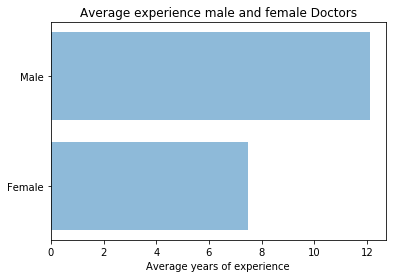

In [65]:
objects = ("Female", "Male")
y_pos = np.arange(len(objects))
performance = [7.491, 12.103]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average years of experience')
plt.title('Average experience male and female Doctors')

Text(0.5,1,'Average Salary male and female Doctors')

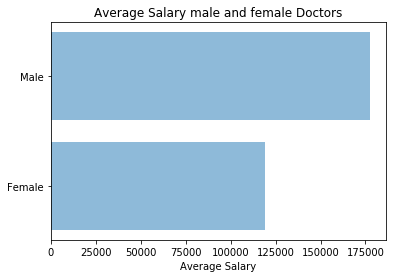

In [66]:
objects = ("Female", "Male")
y_pos = np.arange(len(objects))
performance = [118871.27, 177338.76]
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Salary')
plt.title('Average Salary male and female Doctors')

In [67]:
plt.show()

In [68]:
import MySQLdb
import pandas as pd
import plotly.plotly as py
from plotly.graphs_objs import *
py.sign_in("XXXX", "XXXX")

ModuleNotFoundError: No module named 'MySQLdb'

In [69]:
conn=MySQLdb.connect(host="localhost", user="root", passwd='XXXX', db="world")
cursor = conn.cursor()

NameError: name 'MySQLdb' is not defined

In [70]:
cursor.execute('select Gender, Exper, Sal94, Cert from ID');

NameError: name 'cursor' is not defined

In [71]:
rows = cursor.fetchall()

NameError: name 'cursor' is not defined

In [72]:
str(rows)[0:261]

NameError: name 'rows' is not defined

In [73]:
dflawsuit = pd.DataFrame( [ij for ij in i]) for i in rows] )
dflawsuit.rename(columns={0: 'Gender', 1: 'Exper', 2: 'Sal94', 3: "Cert"}, inplace=True);
dflawsuit = dflawsuit.sort(['Exper'], ascending=[1]);

SyntaxError: invalid syntax (<ipython-input-73-66589c34f7da>, line 1)

In [74]:
dflawsuit.head()

NameError: name 'dflawsuit' is not defined

In [75]:
import plotly.plotly as py
from plotly.graph_objs import *

data = [Bar(x=df_lawsuit.Exper,
            y=df_lawsuit.Sal94)]

py.iplot(data, filename='Lawsuit.csv')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

# Motivation 

In modern society, racism and discrimination are highly relevant topics. These topics are being discussed on countless occasions, given a wide variety of situations under which they occur. Recently, women spoke up about sexual harassment, while using #METOO, this mainly concerned the entertainment industry. Within the same industry, where you see a lot of stereotyping, it is also still the case that males have a significantly larger pay cut compared to females. Taking the initiative to discuss these topics has only been accepted and happening in recent years. This also goes for the topic of the increasing of gender equality. Not only with respect to the number of female managers, directors, politicians or other important job positions but also with respect to the equalization of salaries between male and female. This motivated us to analyze some data on salaries of males compared to females back in the day, when this was not a (daily) topic of discussion. 


# Method

# Results

# Conclusion

Python sucks